In [1]:
import os
import pandas as pd
import numpy as np
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, accuracy_score
from sklearn.model_selection import cross_val_score

# Download necessary NLTK data
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

# Initialize lemmatizer and stopwords
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))

# Preprocessing function
def preprocess_text(text):
    text = text.lower()
    text = re.sub(r'[^\w\s]', '', text)  # Remove punctuation
    text = re.sub(r'\d+', '', text)  # Remove digits
    tokens = word_tokenize(text)  # Tokenize text
    tokens = [lemmatizer.lemmatize(word) for word in tokens if word not in stop_words]
    return ' '.join(tokens)

# Load datasets
train_data = pd.read_csv(r"C:\Users\hp081\Downloads\AWM_train.csv")
dev_data = pd.read_csv(r"C:\Users\hp081\Downloads\AWM_dev.csv")
test_data = pd.read_csv(r"C:\Users\hp081\Downloads\AWM_test_without_labels.csv")

# Combine train and dev datasets
train_data = pd.concat([train_data, dev_data], ignore_index=True)

# Apply preprocessing
train_data['Text'] = train_data['Text'].apply(preprocess_text)
test_data['Text'] = test_data['Text'].apply(preprocess_text)

# Encode labels
train_data['Class'] = train_data['Class'].map({'Abusive': 1, 'Non-Abusive': 0})

# TF-IDF Vectorizer
vectorizer = TfidfVectorizer(max_features=5000, ngram_range=(1, 2), stop_words='english', smooth_idf=True)
X = train_data['Text']
y = train_data['Class']
X_tfidf = vectorizer.fit_transform(X)

# Naive Bayes Classifier
print("\nEvaluating Naive Bayes Classifier:")
naive_bayes_model = MultinomialNB()

# Evaluate with cross-validation
scores = cross_val_score(naive_bayes_model, X_tfidf, y, cv=5, scoring='accuracy')
print(f"Cross-Validation Accuracy: {np.mean(scores):.4f} ± {np.std(scores):.4f}")

# Fit the model on the full training data
naive_bayes_model.fit(X_tfidf, y)
y_pred = naive_bayes_model.predict(X_tfidf)

# Print Classification Report and Accuracy
print("\nClassification Report:")
print(classification_report(y, y_pred))
print(f"Accuracy: {accuracy_score(y, y_pred):.4f}")

# Predict on Test Data
X_test_tfidf = vectorizer.transform(test_data['Text'])
test_predictions = naive_bayes_model.predict(X_test_tfidf)

# Map predicted classes back to labels
label_mapping = {0: 'Non-Abusive', 1: 'Abusive'}
test_data['Predicted_Class_Label'] = test_predictions  # Add predictions as a column first
test_data['Predicted_Class_Label'] = test_data['Predicted_Class_Label'].map(label_mapping)  # Map to labels

# Save predictions as a CSV file
output_dir = r"C:\Users\hp081\Documents"
output_csv_path = os.path.join(output_dir, "AWM_test_predictions_naive_bayes.csv")

# Ensure the directory exists
os.makedirs(output_dir, exist_ok=True)

# Save labels in CSV format, including all relevant columns
test_data[['id', 'Text', 'Predicted_Class_Label']].to_csv(output_csv_path, index=False)
print(f"Predictions saved to {output_csv_path}")

# Function to preprocess the input text
def preprocess_text_input(text):
    text = text.lower()
    text = re.sub(r'[^\w\s]', '', text)  # Remove punctuation
    text = re.sub(r'\d+', '', text)  # Remove digits
    tokens = word_tokenize(text)  # Tokenize text
    tokens = [lemmatizer.lemmatize(word) for word in tokens if word not in stop_words]
    return ' '.join(tokens)

# Function to predict if the input comment is abusive or not
def predict_comment(comment, model, vectorizer):
    # Preprocess the input comment
    processed_comment = preprocess_text_input(comment)

    # Transform the comment using the TF-IDF vectorizer
    comment_vector = vectorizer.transform([processed_comment])

    # Predict using the trained model
    prediction = model.predict(comment_vector)

    # Map the prediction to the label
    label_mapping = {0: 'Non-Abusive', 1: 'Abusive'}
    predicted_label = label_mapping[prediction[0]]

    return predicted_label

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\hp081\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\hp081\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\hp081\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!



Evaluating Naive Bayes Classifier:
Cross-Validation Accuracy: 0.6376 ± 0.0620

Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.84      0.87      1728
           1       0.86      0.91      0.88      1834

    accuracy                           0.88      3562
   macro avg       0.88      0.87      0.87      3562
weighted avg       0.88      0.88      0.87      3562

Accuracy: 0.8751
Predictions saved to C:\Users\hp081\Documents\AWM_test_predictions_naive_bayes.csv


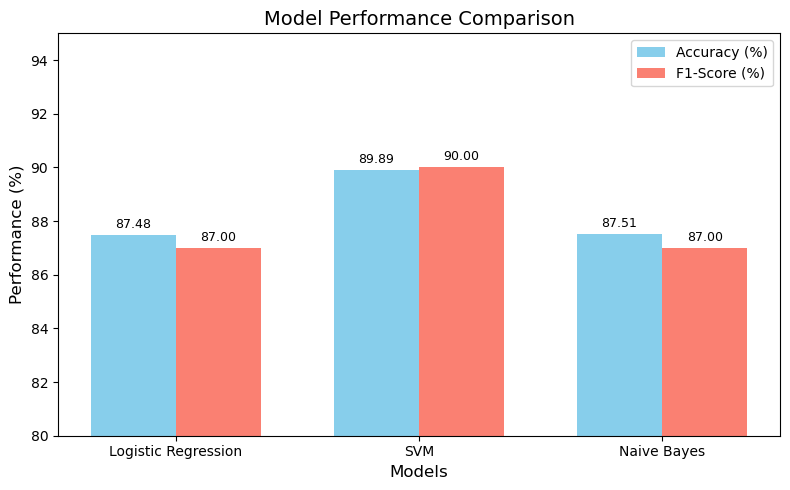

In [1]:
import matplotlib.pyplot as plt
import numpy as np

# Accuracy and F1-score values for the models
models = ['Logistic Regression', 'SVM', 'Naive Bayes']
accuracies = [87.48, 89.89, 87.51]  # Accuracy values in percentage
f1_scores = [87, 90, 87]  # F1-score values in percentage (rounded for simplicity)

# Bar width and positions
bar_width = 0.35
x = np.arange(len(models))

# Create the bar chart
fig, ax = plt.subplots(figsize=(8, 5))
bars1 = ax.bar(x - bar_width/2, accuracies, bar_width, label='Accuracy (%)', color='skyblue')
bars2 = ax.bar(x + bar_width/2, f1_scores, bar_width, label='F1-Score (%)', color='salmon')

# Add labels, title, and legend
ax.set_xlabel('Models', fontsize=12)
ax.set_ylabel('Performance (%)', fontsize=12)
ax.set_title('Model Performance Comparison', fontsize=14)
ax.set_xticks(x)
ax.set_xticklabels(models, fontsize=10)
ax.legend(fontsize=10)
ax.set_ylim(80, 95)  # Set y-axis range for better visualization

# Add value labels on top of the bars
for bars in [bars1, bars2]:
    for bar in bars:
        height = bar.get_height()
        ax.annotate(f'{height:.2f}',
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),  # Offset for the text
                    textcoords="offset points",
                    ha='center', va='bottom', fontsize=9)

# Show the chart
plt.tight_layout()
plt.show()


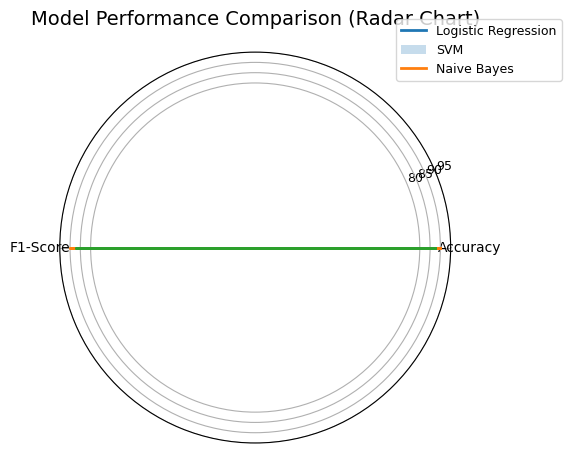

In [2]:
import matplotlib.pyplot as plt
import numpy as np

# Define model names and corresponding values
models = ['Logistic Regression', 'SVM', 'Naive Bayes']
accuracies = [87.48, 89.89, 87.51]  # Accuracy values in percentage
f1_scores = [87, 90, 87]  # F1-score values in percentage (rounded for simplicity)

# Combine metrics into a single array for the radar chart
metrics = np.array([accuracies, f1_scores])
metrics_labels = ['Accuracy', 'F1-Score']

# Number of variables (metrics)
num_vars = len(metrics_labels)

# Create radar chart
fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(polar=True))

# Create angle values for each metric
angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()
angles += angles[:1]  # Repeat the first value to close the circle

# Loop through each model and plot
for i, model in enumerate(models):
    values = metrics[:, i].tolist()
    values += values[:1]  # Repeat the first value to close the circle
    ax.plot(angles, values, label=model, linewidth=2)
    ax.fill(angles, values, alpha=0.25)

# Set chart labels
ax.set_yticks([80, 85, 90, 95])
ax.set_yticklabels(['80', '85', '90', '95'], fontsize=9)
ax.set_xticks(angles[:-1])
ax.set_xticklabels(metrics_labels, fontsize=10)
ax.set_title("Model Performance Comparison (Radar Chart)", fontsize=14, pad=20)

# Add legend
ax.legend(models, loc='upper right', bbox_to_anchor=(1.3, 1.1), fontsize=9)

# Show radar chart
plt.tight_layout()
plt.show()
